In [69]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Import auxiliary image maipulation libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Main pipeline class
from CloudSaturation import CloudSaturation

# Image plotting utils
from Utils import *
from MLUtils import *
import datetime

In [ ]:
# Define bounding box of interest (Tulips field in netherlands in our case)
full_tulip_box = [52.82601970123596, 4.684766350546853,52.93210351553535, 4.860547600546853]
# Initialize main pipeline object
# This object will hold all auxiliary data structures and methods needed for processing
# most importantly, all calls made for same CloudSaturation object could reuse same cloud detection data, 
# precomputed and stored in self.memo_data for downloaded data
netherlands_cloud = CloudSaturation(full_tulip_box, cloud_scale=6)

In [4]:
# Acquire first batch of data and cloud filter for corresponding space (determined by bounding box) 
# and time range (determined by constructor parameters)
mask_full, true_c_full, bands, dates_full, cloud_masks_full = \
    netherlands_cloud.get_cloud_saturation_mask()

Saved True color
Saved cloud detection bands
Saved bands
Downloaded data
Detecting clouds, this may take some time...
Cloud detection finished


0.16722436937668614
0.23884147397524225


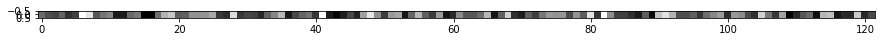

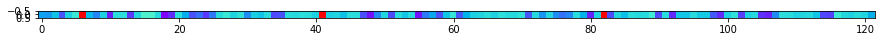

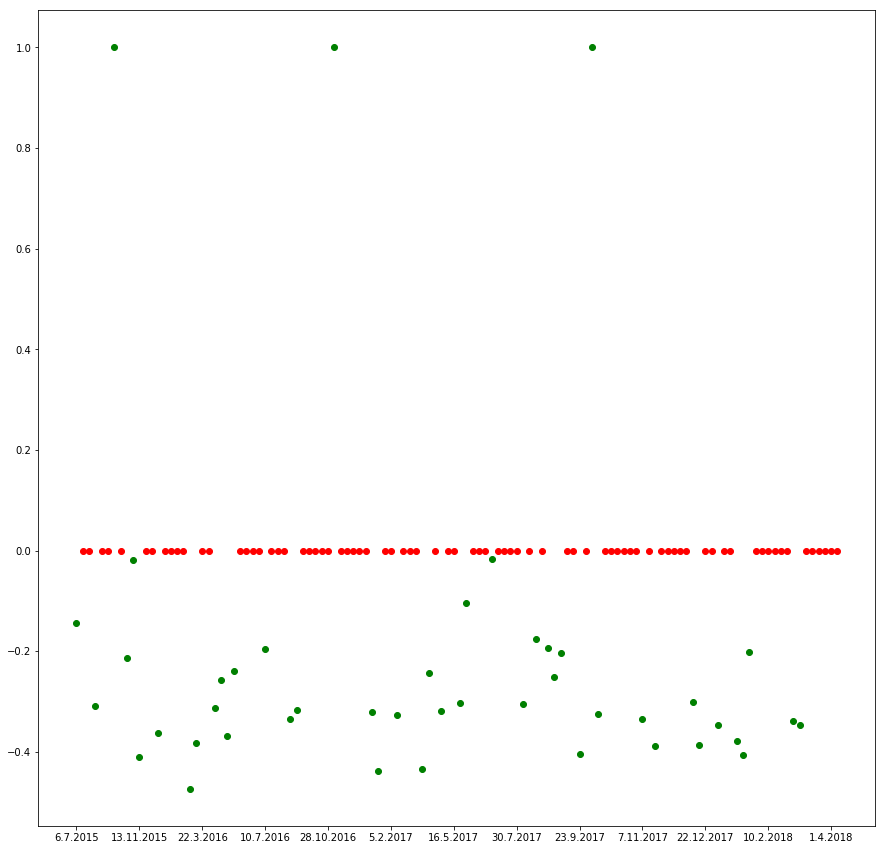

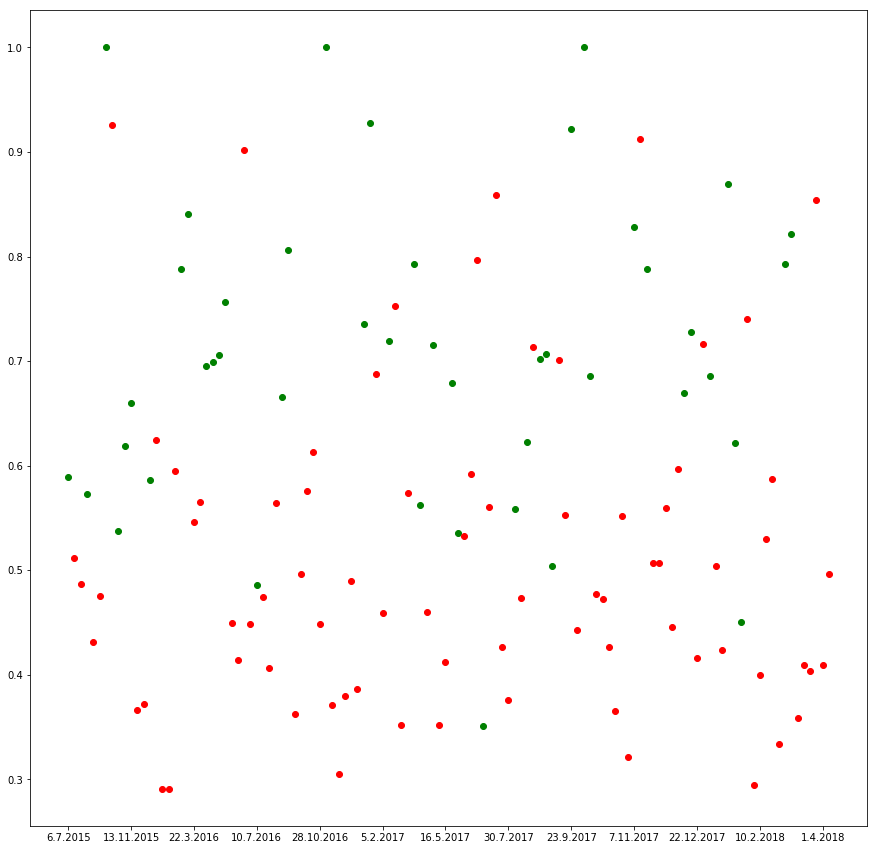

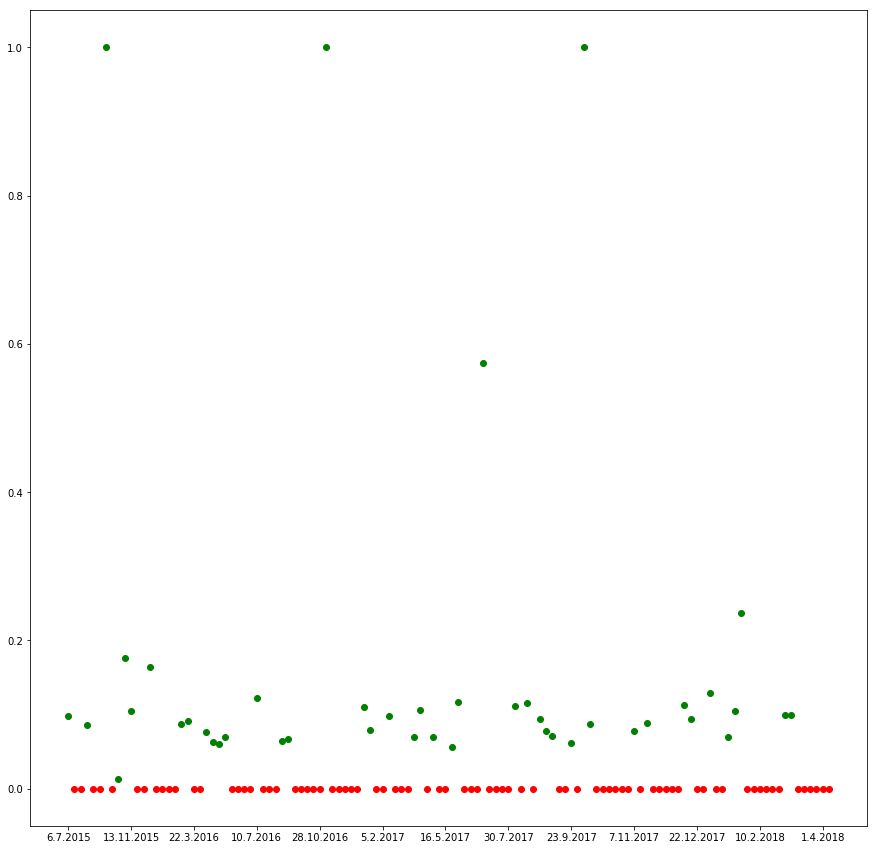

In [72]:
x_ind, y_ind = 239, 120
plot_timeseries(grayscale[:,x_ind,y_ind])
plot_timeseries(ndvi[:,x_ind,y_ind], cmap="rainbow")
# Filter with cloud data
cf=netherlands_cloud.get_cloud_filter(x_ind,y_ind)
vis =netherlands_cloud.get_visible_filter(x_ind,y_ind)
#ka = np.zeros(grayscale[:,x_ind,y_ind].shape)
#ka[cf] = 1
# White are clouds
#plot_timeseries(ka, cmap="gray")
#print(len(cf[0])/len(ndvi))
plot_timeseries_line(ndvi[:, x_ind, y_ind], vis, spec="go", datesp=dates_full)
plot_timeseries_line(ndvi[:, x_ind, y_ind]*0, cf, spec="ro", new=False)
plt.savefig(f"ts/ndvi_index_full_netherlands_{x_ind},{y_ind}", bbox_inches='tight', pad_inches=0)
plot_timeseries_line(grayscale[:, x_ind, y_ind], vis, spec="go", datesp=dates_full)
plot_timeseries_line(grayscale[:, x_ind, y_ind], cf, spec="ro", new=False)
plt.savefig(f"ts/moisture_index_full_netherlands_{x_ind},{y_ind}", bbox_inches='tight', pad_inches=0)
plot_timeseries_line(agri[:, x_ind, y_ind], vis, spec="go", datesp=dates_full)
plot_timeseries_line(agri[:, x_ind, y_ind]*0, cf, spec="ro", new=False)
plt.savefig(f"ts/agricultural_index_full_netherlands_{x_ind},{y_ind}", bbox_inches='tight', pad_inches=0)
x_ind, y_ind
print(np.mean(rgb2gray(agri[:,x_ind,y_ind][vis])))
print(np.std(rgb2gray(agri[:,x_ind,y_ind][vis])))
#plot_timeseries_line(grayscale[:, x_ind, y_ind], vis, spec="bo")
#plot_timeseries_line(grayscale[:, x_ind, y_ind]*0, cf, spec="ro", new=False)

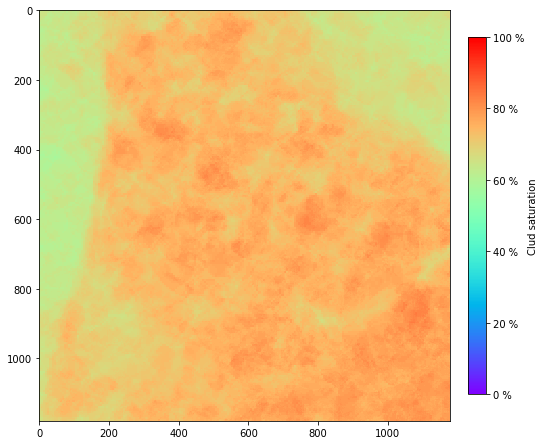

In [5]:
# Plot full cloud mask acquired by object (also saved in netherlands_cloud.memo_data_total_mask_w)
# The mask for each pixel is calculated as the portion of images where pixel was classified as cloudy
# Higher values mean more clouds
plot_cloud_mask(mask_full, figsize=(8,8), cmap="rainbow", plot_cmap=True, cmap_frac=0.04)

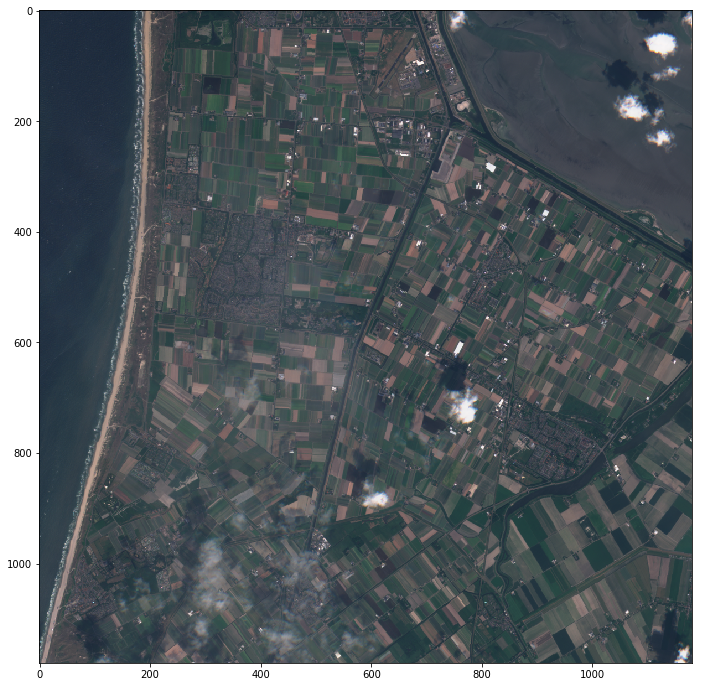

In [6]:
# Get index of first image taken after provided date
may_2017_ind = find_index_after_date(dates_full, datetime.datetime(year=2017, month=5, day=30))
may_image = true_c_full[may_2017_ind]
plot_image(may_image, figsize=(12,12))

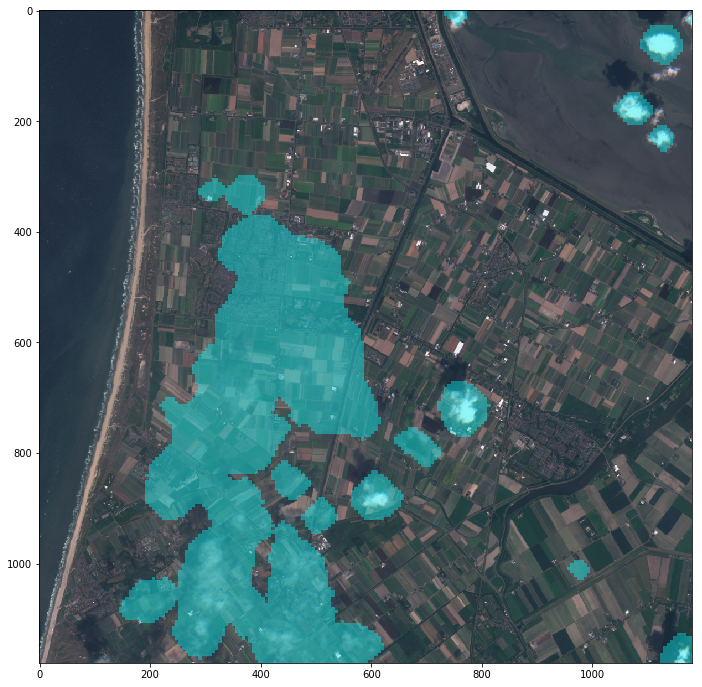

In [39]:
# Plot True Color image and corresponding overlaid cloud mask, notice that cloud detection is quite good
# in particular, thin clouds are also detected in center of the image, which may obscure or otherwise harm
# measurements (bands might be sufficiently distorted to disable any sound conclusions)
overlay_cloud_mask(may_image, cloud_masks_full[may_2017_ind], figsize=(12,12))

Text(0.5,1,'Time of image acquisitions')

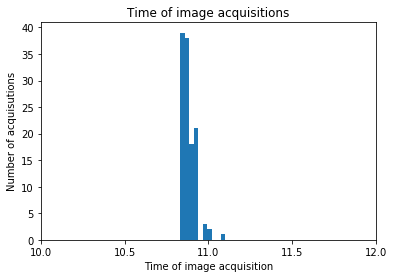

In [7]:
hours = [date.hour + date.minute/60 for date in dates_full]
plt.hist(hours)
plt.xticks([10,10.5, 11, 11.5,12])
plt.xlabel("Time of image acquisition")
plt.ylabel("Number of acquisutions")
plt.title("Time of image acquisitions")

In [9]:
# CloudSaturation object can be used to efficently get additional data for the same plot of land
# using predefined indices in WMS configurator
# For exaple acquire three different inidices for same area and date range
# Moisture index in grayscale -> most suitable for quick visualization
grayscale = netherlands_cloud.get_full_index_timeseries("MOISTURE-GRAYSCALE2")
# NDVI index
ndvi = netherlands_cloud.get_full_index_timeseries("NDVI-NORMAL")
# Agricultural index
agri = netherlands_cloud.get_full_index_timeseries("AGRICULTURE")
print(grayscale.shape)


(122, 1180, 1180)


In [30]:
agri[:, x_ind, y_ind]

array([[0.7625    , 0.69525   , 0.36525   ],
       [0.92568517, 0.821     , 0.58075   ],
       [0.684     , 0.7055    , 0.49225   ],
       [0.6335    , 0.86775   , 0.3405    ],
       [0.94472224, 0.96805555, 0.96327776],
       [0.44625   , 0.80275   , 0.771     ],
       [1.        , 1.        , 1.        ],
       [0.24275   , 0.6385    , 0.73      ],
       [0.0585    , 0.07775   , 0.06475   ],
       [0.0495    , 0.1815    , 0.19425   ],
       [0.54125   , 0.38225   , 0.37675   ],
       [0.9347407 , 0.93531483, 0.92862964],
       [0.9345    , 0.93546295, 0.9289074 ],
       [0.43075   , 0.37875   , 0.4125    ],
       [0.9246111 , 0.9771852 , 0.9783148 ],
       [0.6545    , 0.78      , 0.7685    ],
       [0.654     , 0.78025   , 0.769     ],
       [0.8195    , 0.96966666, 0.96496296],
       [0.3075    , 0.28775   , 0.331     ],
       [0.79425   , 0.56625   , 0.43775   ],
       [0.9491852 , 0.96925926, 0.9639074 ],
       [0.62925   , 0.57625   , 0.44775   ],
       [0.

In [ ]:
# Random indices
x_ind, y_ind = 244, 198
# Filter with cloud data
cf = netherlands_cloud.get_cloud_filter(x_ind,y_ind)
vis = netherlands_cloud.get_visible_filter(x_ind,y_ind)
# Plot timeseries for ndvi index and selected coordinates, with values classified as clouds colored red
plot_timeseries_line(ndvi[:, x_ind, y_ind], vis, spec="go", datesp=dates_full)
# Add cloudy values to plot as red
plot_timeseries_line(ndvi[:, x_ind, y_ind]*0, cf, spec="ro", new=False)
# Plot timeseries for moisture index , but clip cloudy values to 0
plot_timeseries_line(grayscale[:, x_ind, y_ind], vis, spec="go", datesp=dates_full)
plot_timeseries_line(grayscale[:, x_ind, y_ind]*, cf, spec="ro", new=False)
# Plot agricultural index for pixel
plot_timeseries_line(agri[:, x_ind, y_ind], vis, spec="go", datesp=dates_full)
plot_timeseries_line(agri[:, x_ind, y_ind]*0, cf, spec="ro", new=False)
plot_timeseries_line(agri[:, x_ind, y_ind], np.array([may_2017_ind]), spec="bo", new=False, 
                     mfc="none", markersize=30)

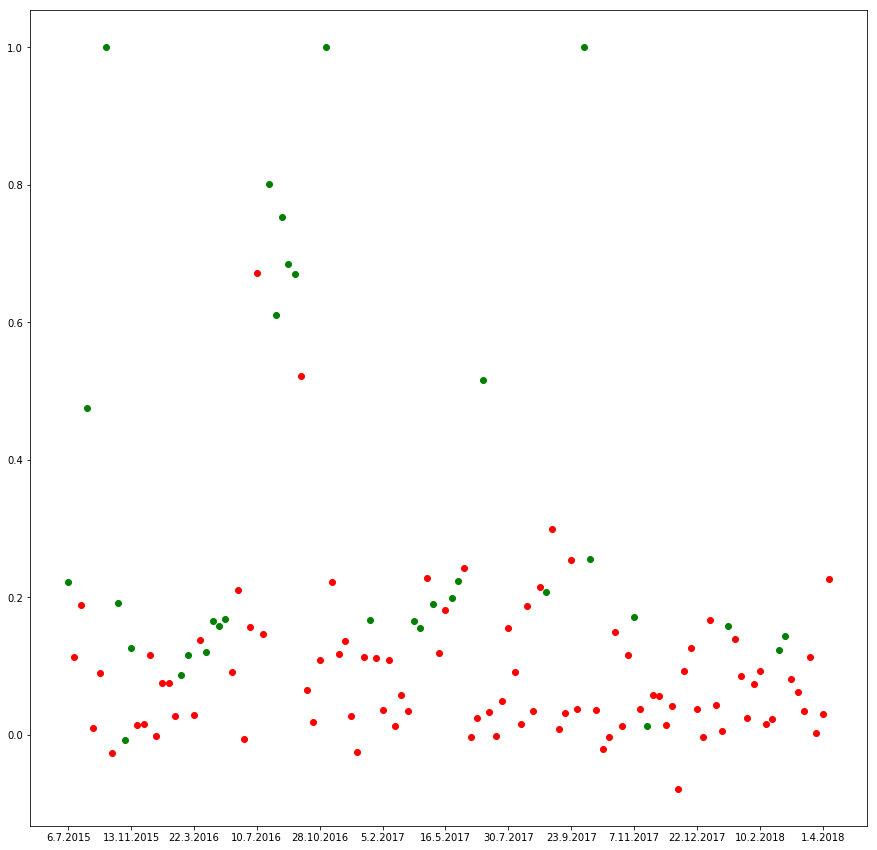

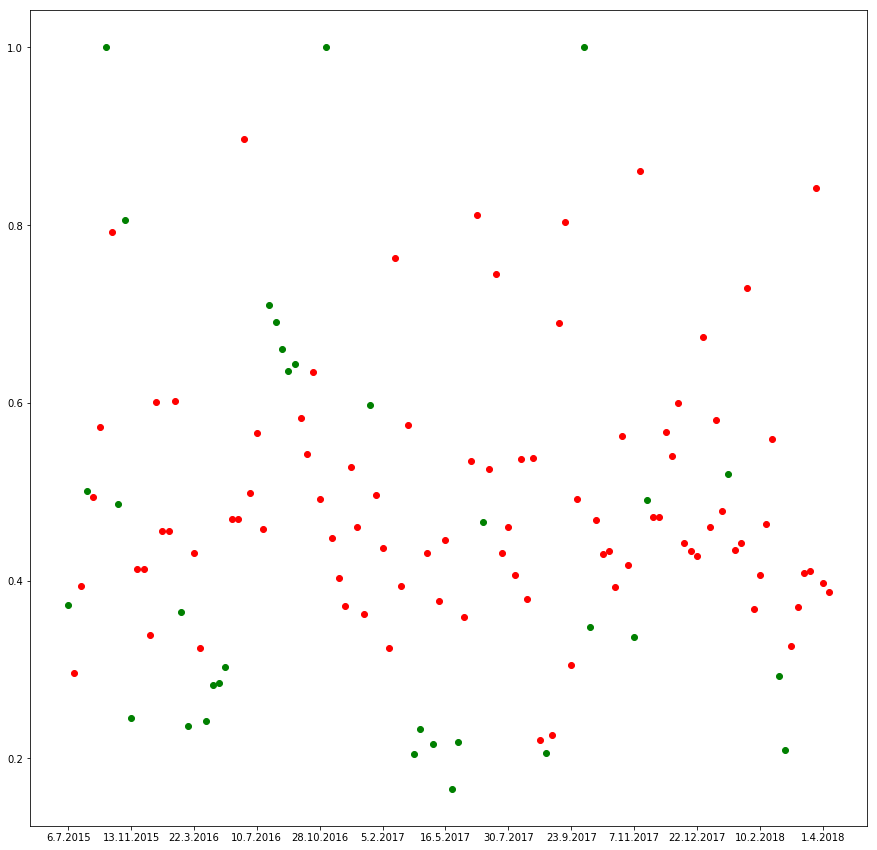

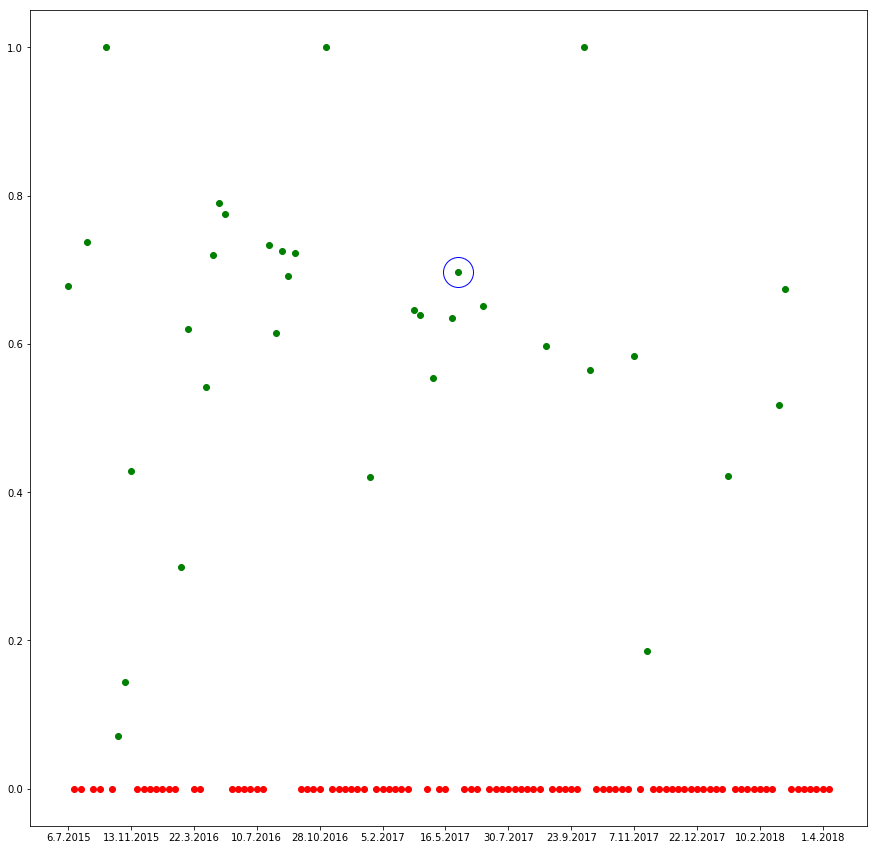

In [37]:
# Random indices
x_ind, y_ind = 123, 567
# Filter with cloud data
cf = netherlands_cloud.get_cloud_filter(x_ind,y_ind)
vis = netherlands_cloud.get_visible_filter(x_ind,y_ind)
# Plot timeseries for ndvi index and selected coordinates, with values classified as clouds colored red
plot_timeseries_line(ndvi[:, x_ind, y_ind], vis, spec="go", datesp=dates_full)
# Add cloudy values to plot as red
plot_timeseries_line(ndvi[:, x_ind, y_ind], cf, spec="ro", new=False)
# Plot timeseries for moisture index , but clip cloudy values to 0
plot_timeseries_line(grayscale[:, x_ind, y_ind], vis, spec="go", datesp=dates_full)
plot_timeseries_line(grayscale[:, x_ind, y_ind], cf, spec="ro", new=False)
# Plot agricultural index for pixel
plot_timeseries_line(agri[:, x_ind, y_ind], vis, spec="go", datesp=dates_full)
plot_timeseries_line(agri[:, x_ind, y_ind]*0, cf, spec="ro", new=False)
plot_timeseries_line(agri[:, x_ind, y_ind], np.array([may_2017_ind]), spec="bo", new=False, 
                     mfc="none", markersize=30)

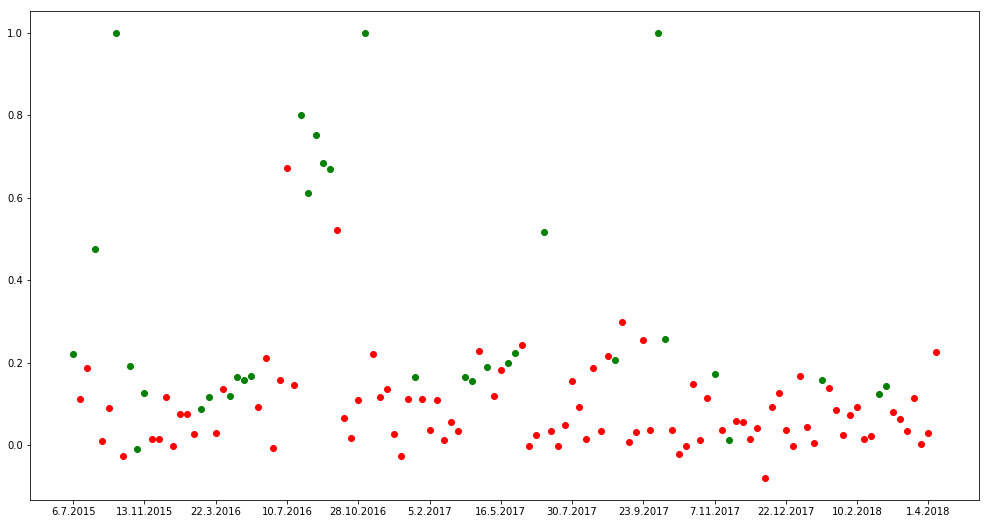

In [51]:
# Random indices
x_ind, y_ind = 123, 567
# Filter with cloud data
cf = netherlands_cloud.get_cloud_filter(x_ind,y_ind)
vis = netherlands_cloud.get_visible_filter(x_ind,y_ind)
# Plot timeseries for ndvi index and selected coordinates, with values classified as clouds colored red
plot_timeseries_line(ndvi[:, x_ind, y_ind], vis, spec="go", datesp=dates_full, figsize=(17,9))
# Add cloudy values to plot as red
plot_timeseries_line(ndvi[:, x_ind, y_ind], cf, spec="ro", new=False)

In [52]:
# Get dataseries for same region (to reuse cloud data)
field_2016, mask_2016, nonzero_2016 = netherlands_cloud.get_tulip_mask("tulip_field_2016")
field_2017, mask_2017, nonzero_2017 = netherlands_cloud.get_tulip_mask("tulip_field_2017")
field_arra, mask_arra, nonzero_arra = netherlands_cloud.get_tulip_mask("arable_land_2017")
# Simple assertions to validate ground truth mask coincides with EO data acquired
date_range, height, width, bands_n = bands.shape
assert len(true_c_full) == date_range
assert bands_n == 13
assert width, height == mask_2016.shape

Downloaded from http://service.geopedia.world/wms/ml_aws?service=WMS&request=GetMap&styles=&format=image%2Fpng&transparent=false&version=1.1.1&layers=ttl1904&height=1180&width=1180&srs=EPSG:3857&bbox=521505.8046283378,6950880.890877021,541073.6838693421,6970448.770118027
Downloaded from http://service.geopedia.world/wms/ml_aws?service=WMS&request=GetMap&styles=&format=image%2Fpng&transparent=false&version=1.1.1&layers=ttl1905&height=1180&width=1180&srs=EPSG:3857&bbox=521505.8046283378,6950880.890877021,541073.6838693421,6970448.770118027
Downloaded from http://service.geopedia.world/wms/ml_aws?service=WMS&request=GetMap&styles=&format=image%2Fpng&transparent=false&version=1.1.1&layers=ttl1917&height=1180&width=1180&srs=EPSG:3857&bbox=521505.8046283378,6950880.890877021,541073.6838693421,6970448.770118027


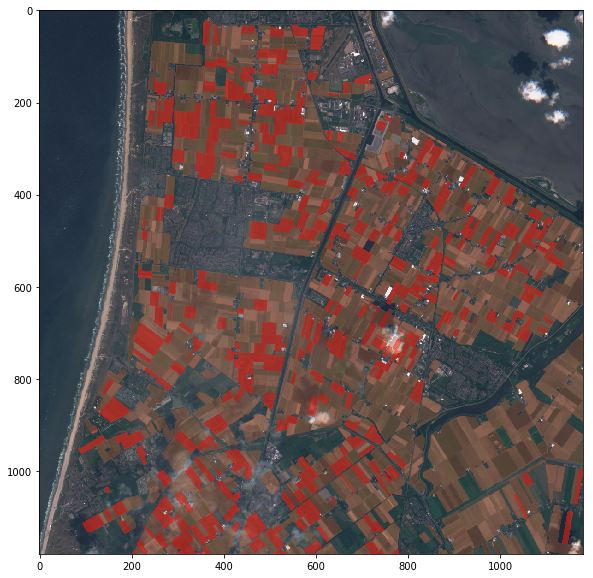

In [58]:
# Since tulip masks function same as cloud masks, we can reuse clud mask plotting function
overlay_cloud_mask(true_c_full[may_2017_ind], [mask_arra, mask_2017], 
                   mask_maps=[[160,82,45],[255,0,0]], figsize=(10,10))

In [39]:
# Find suitable dates for tulips classification
may_2016_i = find_closest_date(dates_full, datetime.datetime(day=1,month=5, year=2016))
may_2017_i = find_closest_date(dates_full, datetime.datetime(day=1,month=5, year=2017)) + 2 # First one is fully cloudy
# TODO: use classifier
may_2016_date = dates_full[may_2016_i]
may_2017_date = dates_full[may_2017_i]

In [ ]:
overlay_cloud_mask(true_c_full[may_2017_i][limit:,:], [mask_2017[limit:,:]], mask_maps=[[255,0,0]])

In [40]:
# Dont shuffle, dont do cross validation, use 80 percent for training
config = {"shuffle": False, "cv_p":0, "train_p":0.8}
# precission, recall, f1
# ignore warnings
result_2016 = train_test_classifier(bands[may_2016_i], mask_2016, **config)
print(result_2016[0])
result_2017 = train_test_classifier(bands[may_2017_i], mask_2017, **config)
print(result_2017[0])

/Users/joosko/work/ijs/ml/SentinelHub/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


KeyboardInterrupt: 

In [ ]:
# Seveda so tulipani v rdeci barvi Klemen, vendar je to zgolj izbira okusa
# po zelji je leto 2016 obarvano roznato
pred2016 = result_2016[1]
pred2017 = result_2017[1]
limit = int(config["train_p"]*mask_2017.shape[0] - 10)
# Draw predictions, only last segment
# first image is correct, second is only testing data
overlay_cloud_mask(true_c_full[may_2016_i][limit:,:], [mask_2016[limit:,:]], mask_maps=[[255,105,180]])
overlay_cloud_mask(true_c_full[may_2016_i][limit:,:], [result_2016[2][limit:,:]], mask_maps=[[255,105,180]])
# Year 2017
overlay_cloud_mask(true_c_full[may_2017_i][limit:,:], [mask_2017[limit:,:]], mask_maps=[[255,0,0]])
overlay_cloud_mask(true_c_full[may_2017_i][limit:,:], [result_2017[2][limit:,:]], mask_maps=[[255,0,0]])
# Looks good, precission is ok
# IDEA: use some sort of parcel classifier to join tulip areas

In [ ]:
# VERDICT: BAAAAAAAAD
next_2017_i = may_2017_i - 6
predict_next = pred2017.test_classifier(bands[next_2017_i], mask_2017)
print(predict_next[0])
overlay_cloud_mask(true_c_full[next_2017_i], mask_2017)
overlay_cloud_mask(true_c_full[next_2017_i], predict_next[1])

In [ ]:
config = {"shuffle": False, "cv_p":0, "train_p":0.8, "normalize": False}
for name, method in Classifiers.ALL_NAMED.items():
    print(name, "precission", "recall", "f1")
    result_2016 = train_test_classifier(bands[may_2016_i], mask_2016, method, **config)
    print("2016:", result_2016[0])
    result_2017 = train_test_classifier(bands[may_2017_i], mask_2017, method, **config)
    print("2017:", result_2017[0])

In [ ]:
config = {"shuffle": False, "cv_p":0, "train_p":0.8, "normalize": True}
for name, method in Classifiers.ALL_NAMED.items():
    print(name, "precission", "recall", "f1")
    result_2016 = train_test_classifier(bands[may_2016_i], mask_2016, method, **config)
    print("2016:", result_2016[0])
    result_2017 = train_test_classifier(bands[may_2017_i], mask_2017, method, **config)
    print("2017:", result_2017[0])

In [ ]:
config = {"shuffle": False, "cv_p":0, "train_p":0.8, "normalize": True}
for name, method in Classifiers.ALL_NAMED.items():
    print(name, "precission", "recall", "f1")
    result_2016 = train_test_classifier(bands[may_2016_i], mask_2016, method, **config)
    print("2016:", result_2016[0])
    result_2017 = train_test_classifier(bands[may_2017_i], mask_2017, method, **config)
    print("2017:", result_2017[0])
    limit = int(config["train_p"]*mask_2017.shape[0] - 10)
    # Draw predictions, only last segment
    # first image is correct, second is only testing data
    overlay_cloud_mask(true_c_full[may_2016_i][limit:,:], [mask_2016[limit:,:]], mask_maps=[[255,105,180]])
    overlay_cloud_mask(true_c_full[may_2016_i][limit:,:], [result_2016[2][limit:,:]], mask_maps=[[255,105,180]])
    # Year 2017
    overlay_cloud_mask(true_c_full[may_2017_i][limit:,:], [mask_2017[limit:,:]], mask_maps=[[255,0,0]])
    overlay_cloud_mask(true_c_full[may_2017_i][limit:,:], [result_2017[2][limit:,:]], mask_maps=[[255,0,0]])